# Green Tensor

In [1]:
%pip install -q matplotlib numpy pairinteraction

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi
from pairinteraction.green_tensor import GreenTensorCavity, GreenTensorFreeSpace
from pairinteraction.visualization import plot_pair_potential

if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=False)

/itp3/home/moegerle/Desktop/PairInteraction/pairinteraction_green_tensor/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
n = 85
ket = pi.KetAtom("Sr88_singlet", n=n, l=n - 1, m=n - 1)

# Create single-atom basis and system
basis = pi.BasisAtom("Sr88_singlet", n=(n - 1, n + 1), l=(n - 2, n), m=(n - 2, n))
system = pi.SystemAtom(basis)
system.set_magnetic_field([0, 0, 1], "gauss")
system.set_electric_field([0, 0, 1], "V/cm")
system.diagonalize()

# Create two-atom basis
pair_energy_ghz = 2 * system.get_corresponding_energy(ket, unit="GHz")
energy_range_ghz = (pair_energy_ghz - 1, pair_energy_ghz + 1)
basis_pair = pi.BasisPair([system, system], energy=energy_range_ghz, energy_unit="GHz")

## SystemPair without custom Green Tensor for comparison

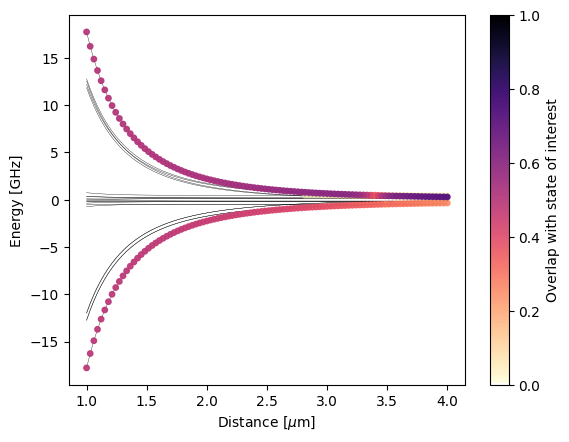

In [3]:
distances = np.linspace(1, 4, 100)  # micrometers
system_pairs = [
    pi.SystemPair(basis_pair).set_distance_vector([d, 0, 0], unit="micrometer")
    for d in distances
]
pi.diagonalize(system_pairs, diagonalizer="eigen", sort_by_energy=True)
fig, ax = plot_pair_potential(system_pairs, (ket, ket))
plt.show(fig)

## SystemPair with custom Vacuum Green Tensor

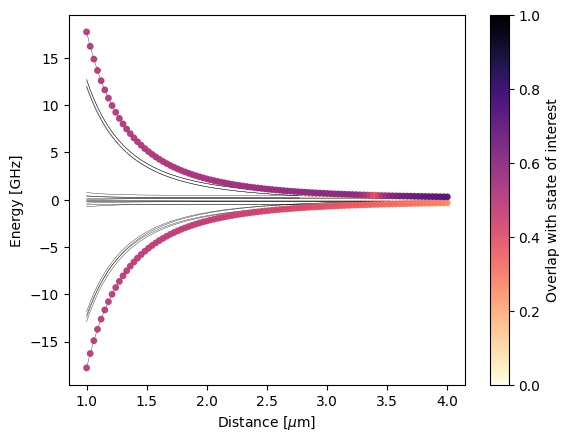

In [4]:
system_pairs: list[pi.SystemPair] = []

distances = np.linspace(1, 4, 100)  # micrometer
for i, distance in enumerate(distances):
    print(f"{i + 1}/{len(distances)}", end="\r")
    gt = GreenTensorFreeSpace()
    gt.set_static_limit(True)
    gt.set_atom_positions([0, 0, 0], [distance, 0, 0], "micrometer")
    gt.set_electric_permitivity(1)
    system_pair = pi.SystemPair(basis_pair).set_green_tensor(gt)
    system_pairs.append(system_pair)

pi.diagonalize(system_pairs, diagonalizer="eigen", sort_by_energy=True)
fig, ax = plot_pair_potential(system_pairs, (ket, ket))
plt.show(fig)

## SystemPair with custom Green Tensor in a cavity

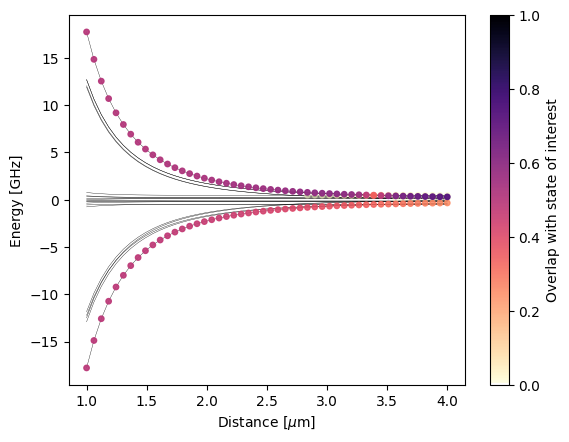

In [5]:
system_pairs: list[pi.SystemPair] = []

distances = np.linspace(1, 4, 50)  # micrometer
cavity_height = 1e9  # micrometer
eps1, eps2 = 3.9, 11.7
eps1, eps2 = 1, 1
for i, distance in enumerate(distances):
    print(f"{i + 1}/{len(distances)}", end="\r")
    gt = GreenTensorCavity()
    gt.set_static_limit(True)
    gt.set_atom_positions([0, 0, 0], [distance, 0, 0], "micrometer")
    gt.set_electric_permitivity(1)
    gt.set_surface_positions(-cavity_height / 2, cavity_height / 2, "micrometer")
    gt.set_electric_permitivity_surfaces(eps1, eps2)
    system_pair = pi.SystemPair(basis_pair).set_green_tensor(gt)
    system_pairs.append(system_pair)

pi.diagonalize(system_pairs, diagonalizer="eigen", sort_by_energy=True)
fig, ax = plot_pair_potential(system_pairs, (ket, ket))
plt.show(fig)